<a href="https://colab.research.google.com/github/Saksham9804/Sigma-Task/blob/main/Sigma_task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Head:
       Sort   Invoice ID Branch       City Customer type  Gender  \
0  0.721157  811-35-1094    NaN   Mandalay        Member    Male   
1  0.150600  546-80-2899      A     Yangon        Member    Male   
2  0.946204  449-27-2918      B   Mandalay        Member  Female   
3  0.423019  503-07-0930      C  Naypyitaw        Member    Male   
4  0.430853  592-46-1692      C  Naypyitaw        Member  Female   

             Product line  Unit price Quantity   Tax 5%     Total        Date  \
0  Electronic accessories       50.45      Six  15.1350  317.8350  02-06-2019   
1      Home and lifestyle       37.69        2   3.7690   79.1490   2/20/2019   
2       Sports and travel         NaN        1   1.9560   41.0760   3/26/2019   
3       Sports and travel       58.39        7  20.4365  429.1665   2/23/2019   
4      Food and beverages       36.77        7  12.8695  270.2595  01-11-2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  15:16  

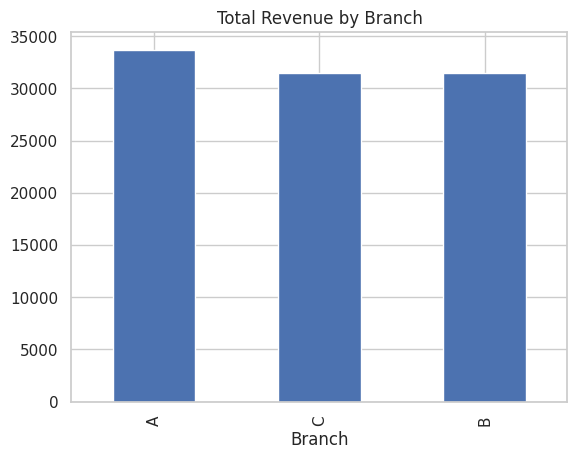


Total Sales by Product Line:
 Product line
Fashion accessories       20699.1540
Home and lifestyle        20563.1265
Food and beverages        17207.1060
Sports and travel         15382.0065
Health and beauty         13012.4190
Electronic accessories    12359.5080
Name: Total, dtype: float64


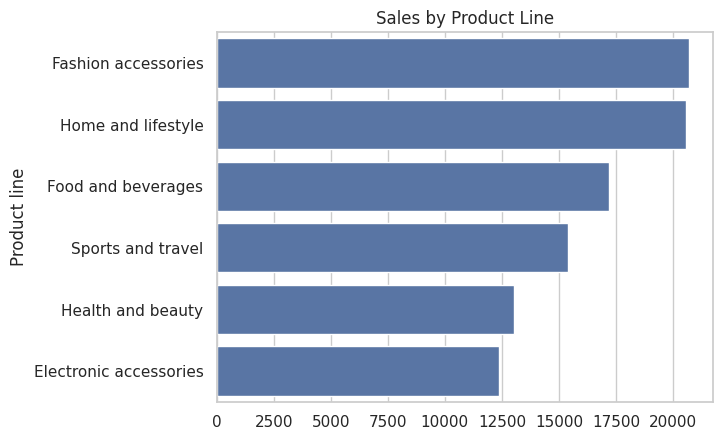


Average Transaction Value per City:
City
Madalay      375.364500
Mandalay     325.522248
Mandlay      263.970000
Naypyitaw    370.321433
Naypytaw     100.485000
Yangon       320.694729
Name: Total, dtype: float64

Average Spend by Customer Type:
Customer type
Member    338.632099
Normal    334.822891
Name: Total, dtype: float64


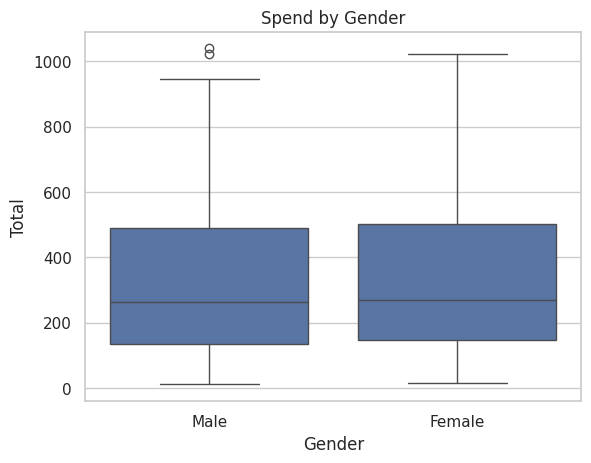


Preferred Payment Methods:
Payment
Credit card    100
Ewallet         94
Cash            92
Name: count, dtype: int64


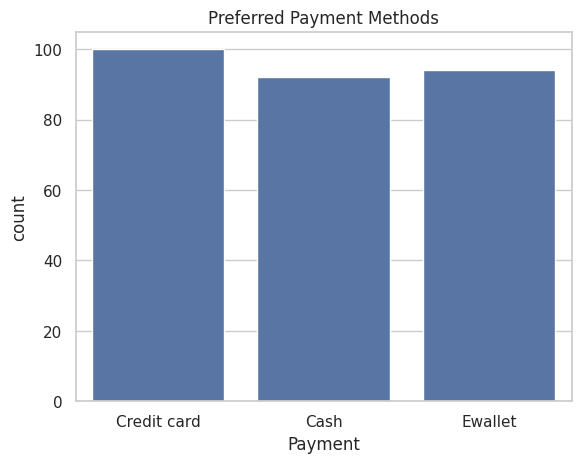

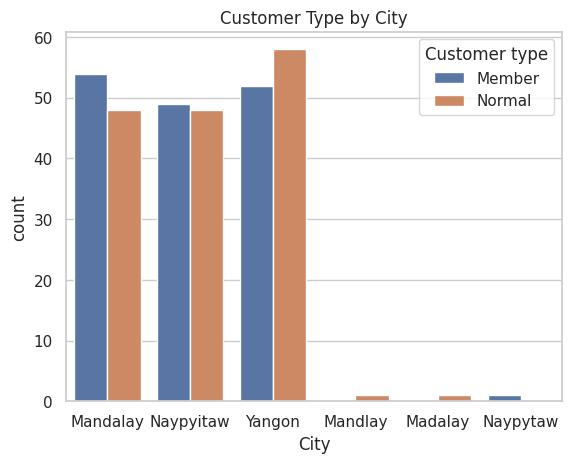

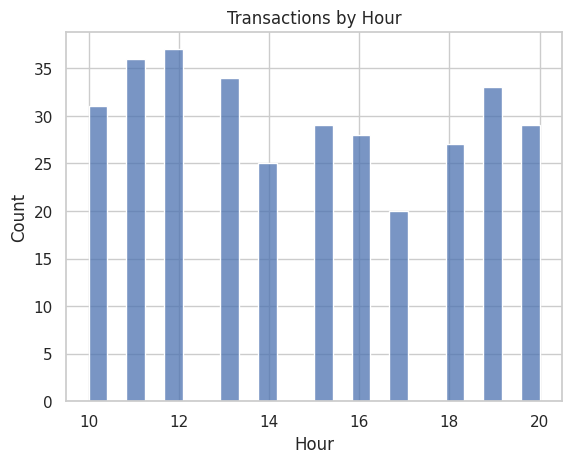


Average Rating by Product Line:
Product line
Health and beauty         7.223913
Food and beverages        7.149057
Fashion accessories       7.106452
Electronic accessories    7.028000
Home and lifestyle        6.872581
Sports and travel         6.747059
Name: Rating, dtype: float64


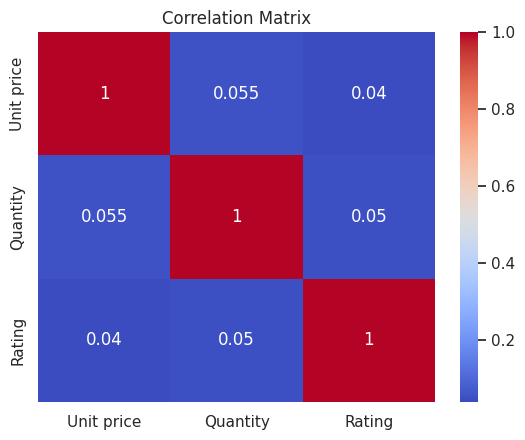

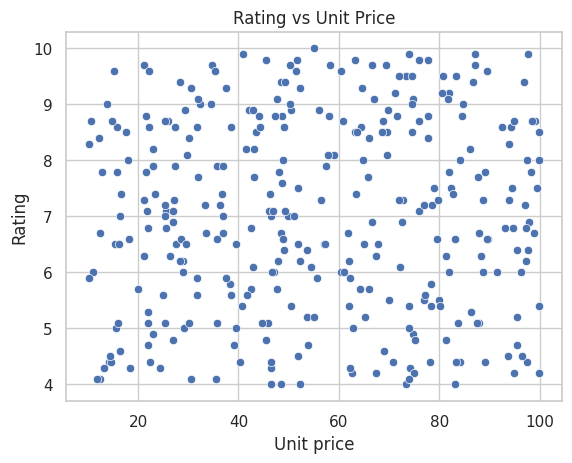


Gross Income by Branch:
Branch
C    1704.0865
A    1668.6225
B    1621.2990
Name: gross income, dtype: float64

Profit per Unit Sold:
Product line
Fashion accessories       2.999232
Sports and travel         2.802912
Home and lifestyle        2.786620
Food and beverages        2.765066
Health and beauty         2.754828
Electronic accessories    2.589471
dtype: float64

Transactions Per Hour:
Time
10    31
11    36
12    37
13    34
14    25
15    29
16    28
17    20
18    27
19    33
20    29
Name: count, dtype: int64

Regression Performance:
RMSE: 1.6630428235894796
R² Score: -0.00194518507082031

Classification Performance:
Accuracy: 0.5396825396825397
              precision    recall  f1-score   support

         0.0       0.55      0.50      0.52        32
         1.0       0.53      0.58      0.55        31

    accuracy                           0.54        63
   macro avg       0.54      0.54      0.54        63
weighted avg       0.54      0.54      0.54        63



In [ ]:

# SIGMA DA Task 1

# PART 1 - Loading the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

# Load dataset
file_path = '/content/Sigma_task1_dataset.csv'
df = pd.read_csv(file_path)

# Preview dataset
print("\nDataset Head:")
print(df.head())
df.info()
print("\nSummary Statistics:")
print(df.describe())

# PART 2 - Data Preprocessing

# a. Handle nulls and duplicates
df.drop_duplicates(inplace=True)

# b. Convert date and time safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time
df.dropna(subset=['Date', 'Time'], inplace=True)

# c. Convert number words to numeric
number_words = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10, 'eleven': 11, 'twelve': 12
}

def word_to_num(x):
    if isinstance(x, str):
        x_lower = x.lower()
        return number_words.get(x_lower, x)
    return x

for col in ['Quantity', 'Unit price', 'Rating']:
    df[col] = df[col].apply(word_to_num)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Quantity', 'Unit price', 'Rating'], inplace=True)

# d. Feature Engineering
df['DayOfWeek'] = df['Date'].dt.day_name()

def get_time_of_day(t):
    if pd.isnull(t): return 'Unknown'
    t = datetime.datetime.strptime(str(t), "%H:%M:%S").time()
    if datetime.time(5, 0) <= t < datetime.time(12, 0): return 'Morning'
    elif datetime.time(12, 0) <= t < datetime.time(17, 0): return 'Afternoon'
    elif datetime.time(17, 0) <= t < datetime.time(21, 0): return 'Evening'
    else: return 'Night'

df['TimeOfDay'] = df['Time'].apply(get_time_of_day)

# PART 3 - Exploratory Data Analysis (EDA)

sns.set(style="whitegrid")

# a. Revenue by branch
branch_revenue = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Branch:\n", branch_revenue)
branch_revenue.plot(kind='bar', title='Total Revenue by Branch')
plt.show()

# b. Sales by product line
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Line:\n", product_sales)
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Sales by Product Line')
plt.show()

# c. Average transaction per city
print("\nAverage Transaction Value per City:")
print(df.groupby('City')['Total'].mean())

# d. Members vs Normal spending
print("\nAverage Spend by Customer Type:")
print(df.groupby('Customer type')['Total'].mean())

# e. Gender-based purchase
sns.boxplot(x='Gender', y='Total', data=df)
plt.title('Spend by Gender')
plt.show()

# f. Preferred payment method
print("\nPreferred Payment Methods:")
print(df['Payment'].value_counts())
sns.countplot(data=df, x='Payment')
plt.title('Preferred Payment Methods')
plt.show()

# g. Customer type by city
sns.countplot(data=df, x='City', hue='Customer type')
plt.title('Customer Type by City')
plt.show()

# h. Peak shopping hours
sns.histplot(df['Time'].apply(lambda x: x.hour), bins=24)
plt.title('Transactions by Hour')
plt.xlabel('Hour')
plt.show()

# i. Highest average rating
print("\nAverage Rating by Product Line:")
print(df.groupby('Product line')['Rating'].mean().sort_values(ascending=False))

# j. Correlation matrix
sns.heatmap(df[['Unit price', 'Quantity', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# k. Price vs Rating
sns.scatterplot(x='Unit price', y='Rating', data=df)
plt.title('Rating vs Unit Price')
plt.show()

# l. Gross income by branch
print("\nGross Income by Branch:")
print(df.groupby('Branch')['gross income'].sum().sort_values(ascending=False))

# m. Profit per unit
profit_per_unit = df.groupby('Product line')['gross income'].sum() / df.groupby('Product line')['Quantity'].sum()
profit_per_unit = profit_per_unit.sort_values(ascending=False)
print("\nProfit per Unit Sold:")
print(profit_per_unit)

# n. Transactions per hour
print("\nTransactions Per Hour:")
print(df['Time'].apply(lambda x: x.hour).value_counts().sort_index())

# PART 4 - Modeling

# Regression: Predict Rating
X_reg = df[['Unit price', 'Quantity', 'gross income']]
y_reg = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

print("\nRegression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Classification: Predict Customer Type
df_model = df.copy()

# Clean and map Customer type
df_model['Customer type'] = df_model['Customer type'].str.strip().str.title()
df_model['Customer type'] = df_model['Customer type'].map({'Member': 1, 'Normal': 0})
df_model.dropna(subset=['Customer type'], inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in ['Gender', 'Product line', 'Payment', 'City', 'Branch', 'TimeOfDay', 'DayOfWeek']:
    df_model[col] = le.fit_transform(df_model[col])

X_cls = df_model.drop(['Customer type', 'Invoice ID', 'Date', 'Time', 'Rating'], axis=1)
y_cls = df_model['Customer type']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

print("\nClassification Performance:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))
